In [5]:
pip install spacy

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data=pd.read_csv(r"C:\Users\HP\Downloads\Restaurant_Reviews.tsv",delimiter="\t",quoting=3)
# quoting =3 ignores double quotes that could lead to processing errors.

In [13]:

data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# preprocessing 

# Text Cleaning for Sentiment Analysis

One of the major requirements of Natural Language Processing (NLP), particularly in sentiment analysis, is to clean the text before training any model. Cleaning the text helps improve the quality of the data and enhances the performance of the model. The cleaning process typically consists of the following steps:

## 1. Removing Punctuations
   - Punctuations can add noise to the data and may not contribute to the sentiment analysis. Therefore, it is essential to remove characters like `.,!?;:'"` from the text.

## 2. Converting All Words to Lower Case
   - Converting all words to lower case ensures that words are treated uniformly. For example, "Happy" and "happy" should be considered the same word.

## 3. Removing Stop Words
   - Stop words are common words that do not carry significant meaning and are often removed from the text. Examples of stop words include:
     - "a"
     - "an"
     - "the"
     - "or"
     - "etc."
   - Removing stop words helps focus on the more meaningful words that contribute to sentiment.

## Conclusion
By performing these cleaning steps, we can prepare the text data for effective sentiment analysis, leading to better model performance and more accurate predictions.

In [16]:
import re #library for simplifying reviews
import nltk
nltk.download('stopwords') #downloading all the stopwords
from nltk.corpus import stopwords #importing stopwords to our notebook
from nltk.stem.porter import PorterStemmer #Stemming is a process that converts a word to its root eg loved => love, stayed => stay.
# this is necessary to optimise the dimention of the sparse matrix that will be made.


corpus = [] # new list that will contain all the cleaned reviews
for i in range(0,1000):
    #remove punctuation by replacing all punctuation with space
    review = re.sub("[^a-zA-z | ^\w+'t]",' ', data['Review'][i])
    
    #transform all capital letters to lower case
    review = review.lower()
    
    #split review to different words to apply stemming
    review = review.split()
    
    #stemming and also ignoring stopwords alongside
    ps = PorterStemmer()
    all_stopwords=stopwords.words('english')
    r_words=['no','not','off','nor',"didn't","isn't","couldn't","haven't",'or',"should've","aren't",
             "couldn","didn","doesn't",'doesn',"don't",'don','hadn',"hadn't",'hasn',"hasn't",'haven',
             'mightn',"mightn't",'mustn',"mustn't","needn't",'needn',"shouldn","shouldn't",'wasn',
             "wasn't","won't","won","wouldn't","because","same",'wouldn','should']
    for words in r_words:
        all_stopwords.remove(words)
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    
    #joining words together to form a cleaned review
    review = ' '.join(review)
    corpus.append(review)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [17]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday off rick steve recommend love', 'select menu great price', 'get angri want damn pho', "honeslti didn't tast fresh", 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier no care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust becaus pretti sure human hair', 'shock becaus no sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', "that' right red velvet cake ohhh stuff good", 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food 4 tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer 23 decent deal', 'like

# Creating Bag of Words Model

This is the major portion of sentiment analysis to create the model which will consist of making the sparse matrix using different words from each review will constitute columns of the matrix and each row will correspond to a review.

The bag-of-words (BOW) model is a representation that turns arbitrary text into fixed-length vectors by counting how many times each word appears. This process is often referred to as vectorization.

Here we loose contextual info about the review i.e its order. Its apparently a bag of words!

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y=data.iloc[:,-1].values

In [20]:
len(X[0])

1605

# Splitting data into training and test set

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Building models

# Implementation of Classification Models

In this section, we will implement three different classification models for our analysis:

## 1. Logistic Regression

## 2. Naive Bayes

## 3. Support Vector Machine (SVM)


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_model1=model1.predict(X_test)

# Analysing model

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_model1))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        97
           1       0.85      0.80      0.82       103

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.82       200



Text(50.722222222222214, 0.5, 'Actual')

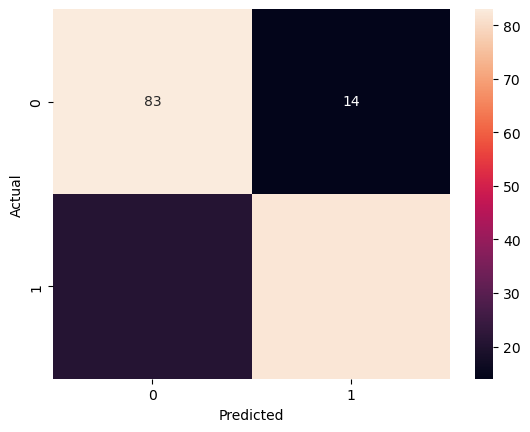

In [27]:
cm=confusion_matrix(y_test,y_model1)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(X_train,y_train)

GaussianNB()

In [29]:
y_model2 = model2.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_model2))

              precision    recall  f1-score   support

           0       0.81      0.58      0.67        97
           1       0.69      0.87      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



Text(50.722222222222214, 0.5, 'Actual')

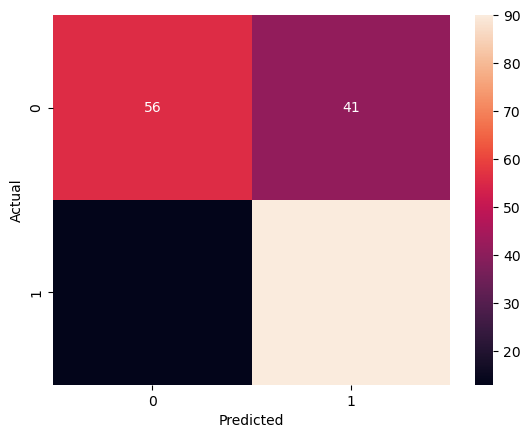

In [31]:
cm=confusion_matrix(y_test,y_model2)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')


SVM

In [32]:
from sklearn.svm import SVC
model3=SVC(kernel='rbf')
model3.fit(X_train,y_train)


SVC()

In [33]:

y_model3 = model3.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_model3))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82        97
           1       0.91      0.68      0.78       103

    accuracy                           0.80       200
   macro avg       0.82      0.80      0.80       200
weighted avg       0.82      0.80      0.80       200



Text(50.722222222222214, 0.5, 'Actual')

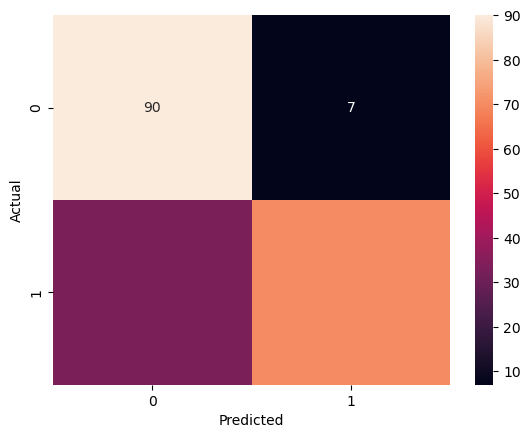

In [35]:

cm=confusion_matrix(y_test,y_model3)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')